In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


**The "Instacart_order_products__train" dataset has been used here for the further analysis**

In [ ]:
csv_file_name = "/content/Instacart_order_products__train.csv"


In [ ]:
df = pd.read_csv( csv_file_name )
df.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



**In this dataset the primary objective is to predict if a certain product was
reordered or not.
So the target_column_name is "reordered"<br>**


In [ ]:
target_column_name = "reordered"

**Target column is categorical**

In [ ]:
categorical_target_column = True
#categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 1384617
Total Number of Columns : 4


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

1    828824
0    555793
Name: reordered, dtype: int64


OBSERVATION

---

There are total 1384617 data points in this dataset . Among which 555793 data points belong to class "0" (not reordered) and other 828824 data points belong to class "1" (reordered) .
This indicates that in the dataset the data points are not equally distributed among the classes.

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

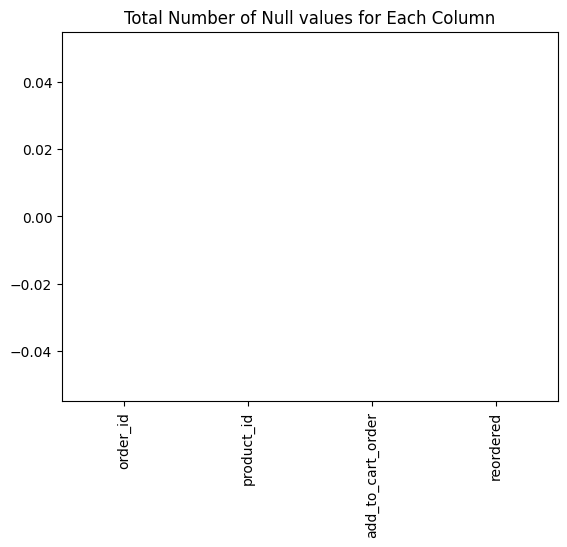

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

OBSERVATION

---

**The dataset has no missing value which creates less problem in analysing the data**


In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


OBSERVATION

---
**There is no duplicate entries in this data set**


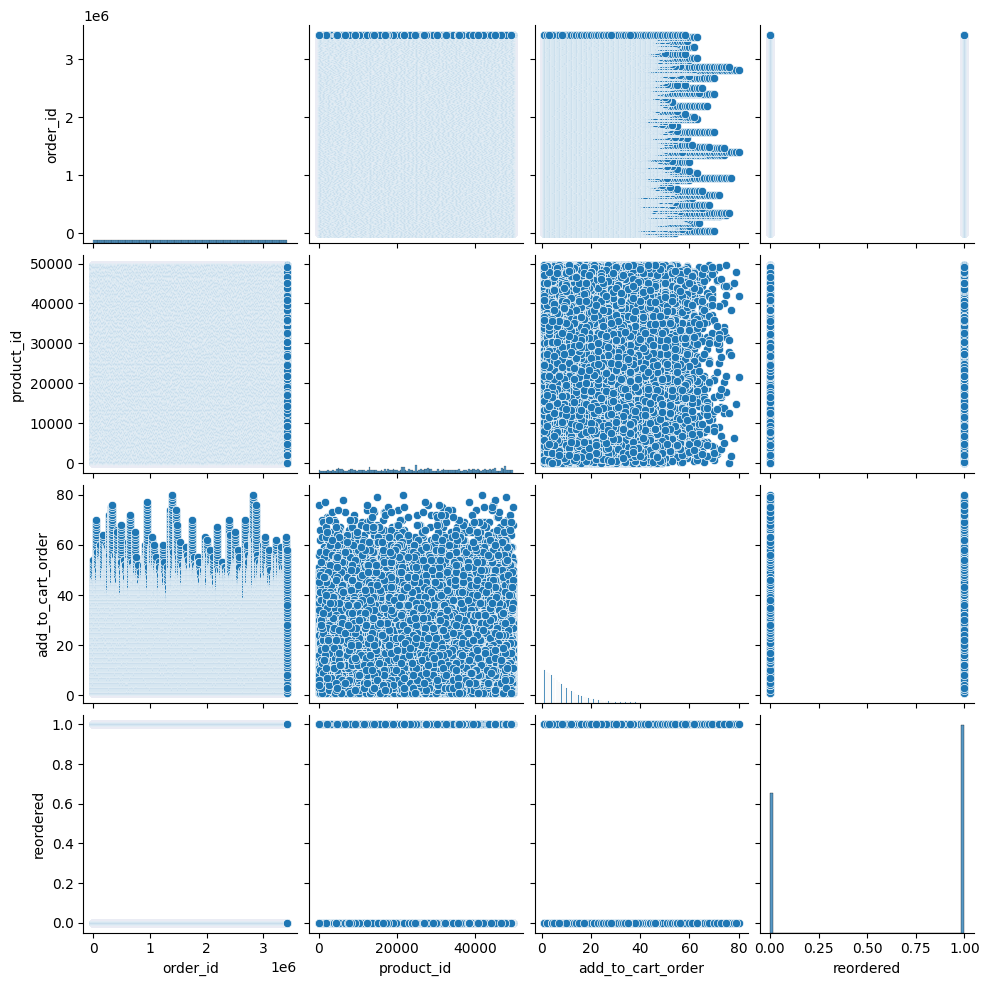

In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION

---
From the pair plot above some of the observations are :-   

1.**add_to_cart_order** : From the histogram analysis it can be observed that the graph is right skewed . Also , mentionably high number of customers add the product.

2.   **Order_Id** : Order_id and add_to_cart_order has created multimodal histogram

3.  **Reorder** : Reorder is higher


In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


-----------------Unique Values per column--------------------------------




order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

**"reordered" is categorical and "order_id" , "product_id", "add_to_cart_order " are numerical**

In [ ]:
categorical_columns = ["reordered" ]
numeric_columns = [ "order_id" , "product_id", "add_to_cart_order " ]

OBSERVATION

---
These plots provide insights into the distribution of 'add_to_cart_order' and the frequency of 'reordered' items in the dataset

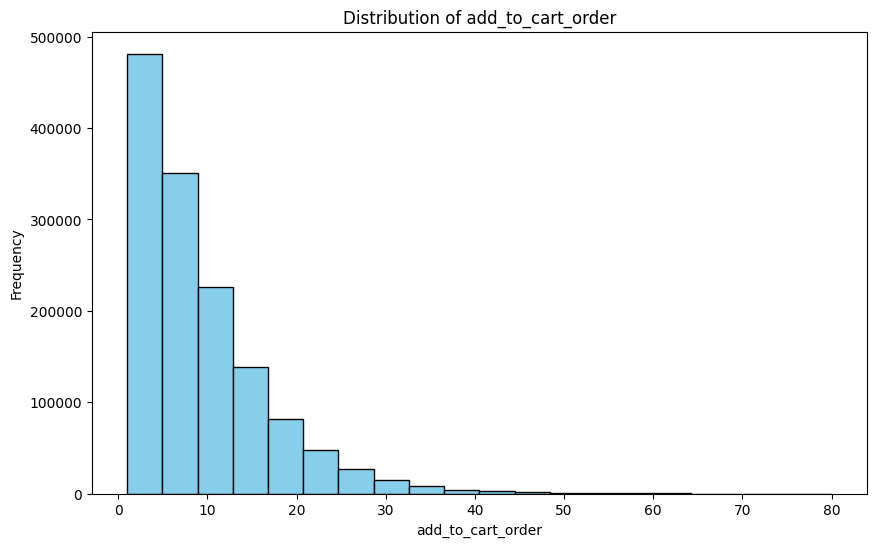

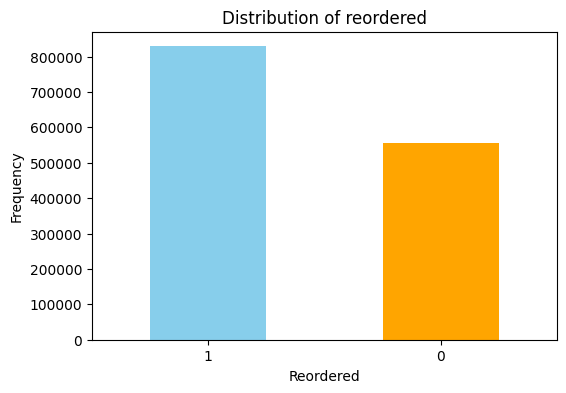

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['add_to_cart_order'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of add_to_cart_order')
plt.xlabel('add_to_cart_order')
plt.ylabel('Frequency')
plt.show()

# Plotting reordered using a bar plot
plt.figure(figsize=(6, 4))
df['reordered'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of reordered')
plt.xlabel('Reordered')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


<Axes: >

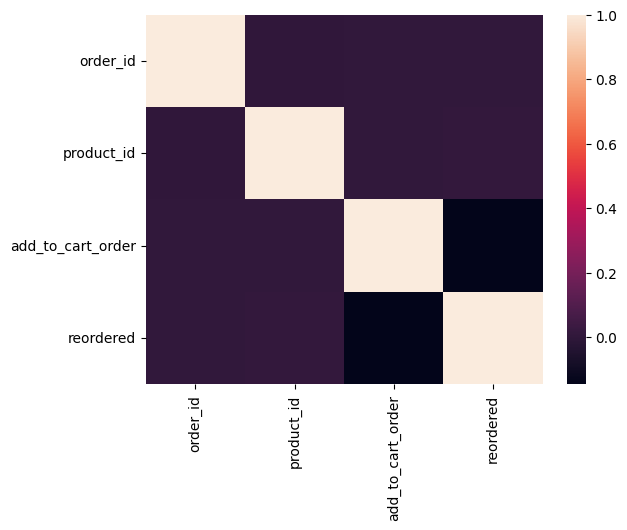

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION

---

A very strong negative correlation has been observed between the "add_to_cart_order" and "reordered" columns. This indicates that as the values in "add_to_cart_order" increase, the corresponding reorders tend to decrease.

Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X = df.iloc[:5000].drop(["reordered"]  , axis =1)
y= df.iloc[:5000]["reordered"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       598
           1       0.60      1.00      0.75       902

    accuracy                           0.60      1500
   macro avg       0.30      0.50      0.38      1500
weighted avg       0.36      0.60      0.45      1500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


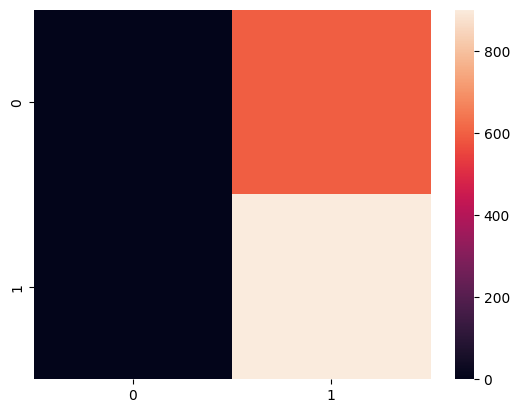

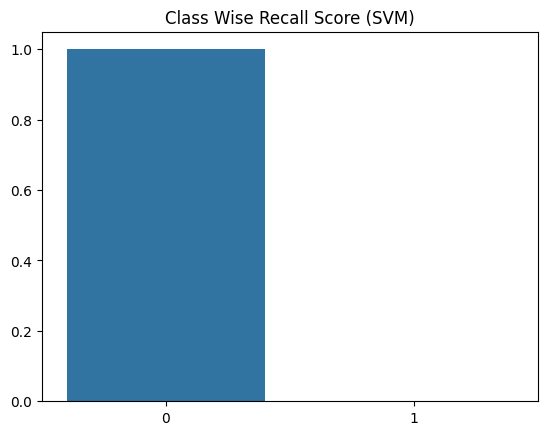

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


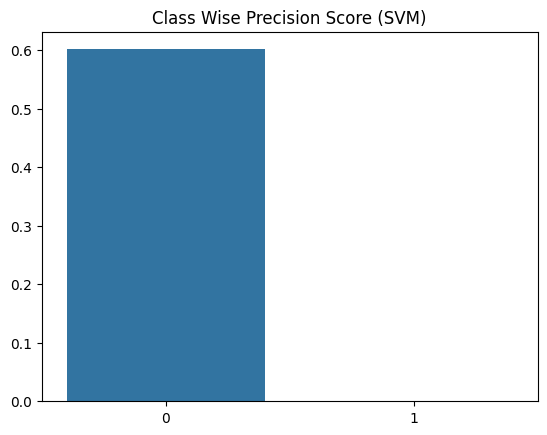

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---
The classification report suggests a model with high precision (0.60) and recall (1.00) for class 1, indicating accurate predictions. However, for class 0, precision, recall, and F1-score are all 0.00, implying the model's inability to correctly predict instances of class 0, resulting in an overall accuracy of 0.60.



              precision    recall  f1-score   support

           0       0.49      0.51      0.50       598
           1       0.67      0.65      0.66       902

    accuracy                           0.60      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.60      0.60      0.60      1500



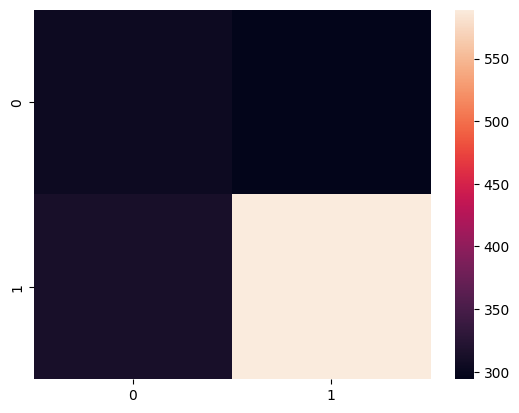

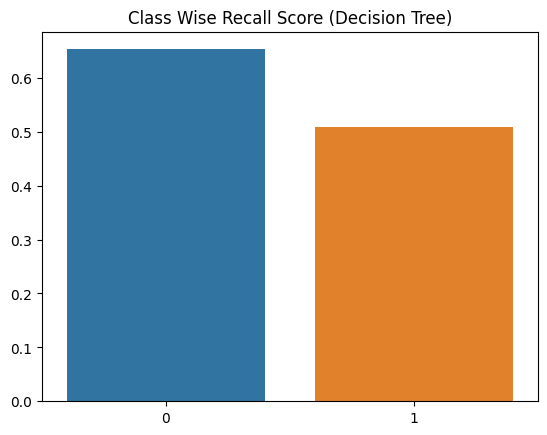

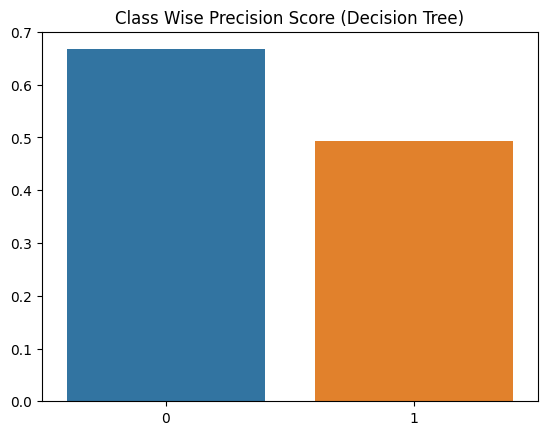

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---

The classification report indicates a Decision Tree model with moderate performance. It shows imbalanced precision, recall, and F1-scores for both classes (0 and 1), resulting in an overall accuracy of 0.60. The model demonstrates fair effectiveness in distinguishing between the two classes in the dataset.
